# Exploratory Data Analysis (EDA)

Conduct EDA on the 'Laptop Price' to examine relationships between variables and other patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Accessing cleaned datafram from Data Wrangling book

In [2]:
%store -r laptop_data

In [3]:
laptop_data

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight_lb,$Price,TouchScreen,...,X_res,Y_res,Cpu processor,Processor_speed_GHz,Memory_type,Total_memory_size,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,13.3,2560x1600,8,Average,No OS,3.02085,1527.25,0,...,2560,1600,Intel Processor,2.3,SSD,256,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Average,No OS,2.95470,1024.79,0,...,1440,900,Intel Processor,1.8,Flash Storage,256,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,Average,No OS,4.10130,655.50,0,...,1920,1080,Intel Processor,2.5,SSD,512,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,Average,No OS,4.03515,2892.69,0,...,2880,1800,Intel Processor,2.7,SSD,1024,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,Average,No OS,3.02085,2056.10,0,...,2560,1600,Intel Processor,3.1,SSD,512,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,Average,Windows,3.96900,727.32,1,...,1920,1080,Intel Processor,2.5,SSD,256,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,Average,Windows,2.86650,1708.86,1,...,3200,1800,Intel Processor,2.5,SSD,1024,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,Average,Windows,3.30750,261.06,0,...,1366,768,Intel Processor,1.6,Flash Storage,128,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,Average,Windows,4.82895,870.96,0,...,1366,768,Intel Processor,2.5,HHD,2000,1000,0,0,0


# Analysis of Price Data

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


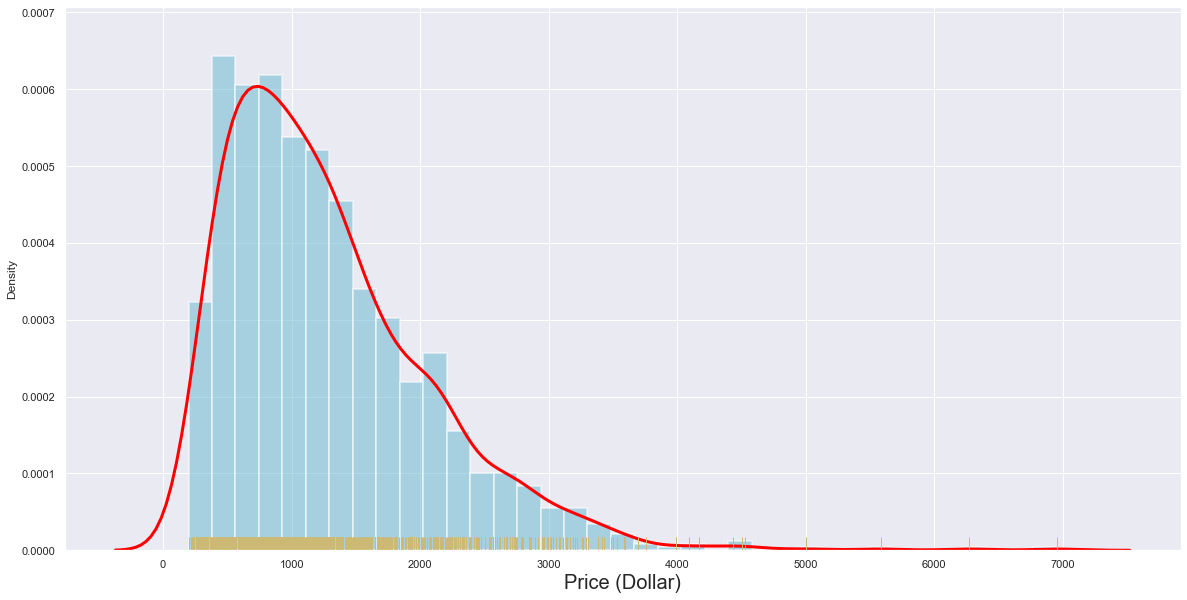

In [36]:
sns.distplot(laptop_data['$Price'], rug=True, rug_kws={'color':'y'},
             kde_kws={'color':'red', 'lw':3},
            hist_kws={'lw':2, 'color':'c', 'alpha':0.5})
sns.set({'figure.figsize':(20,15)})
plt.xlabel('Price (Dollar)', size=20)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


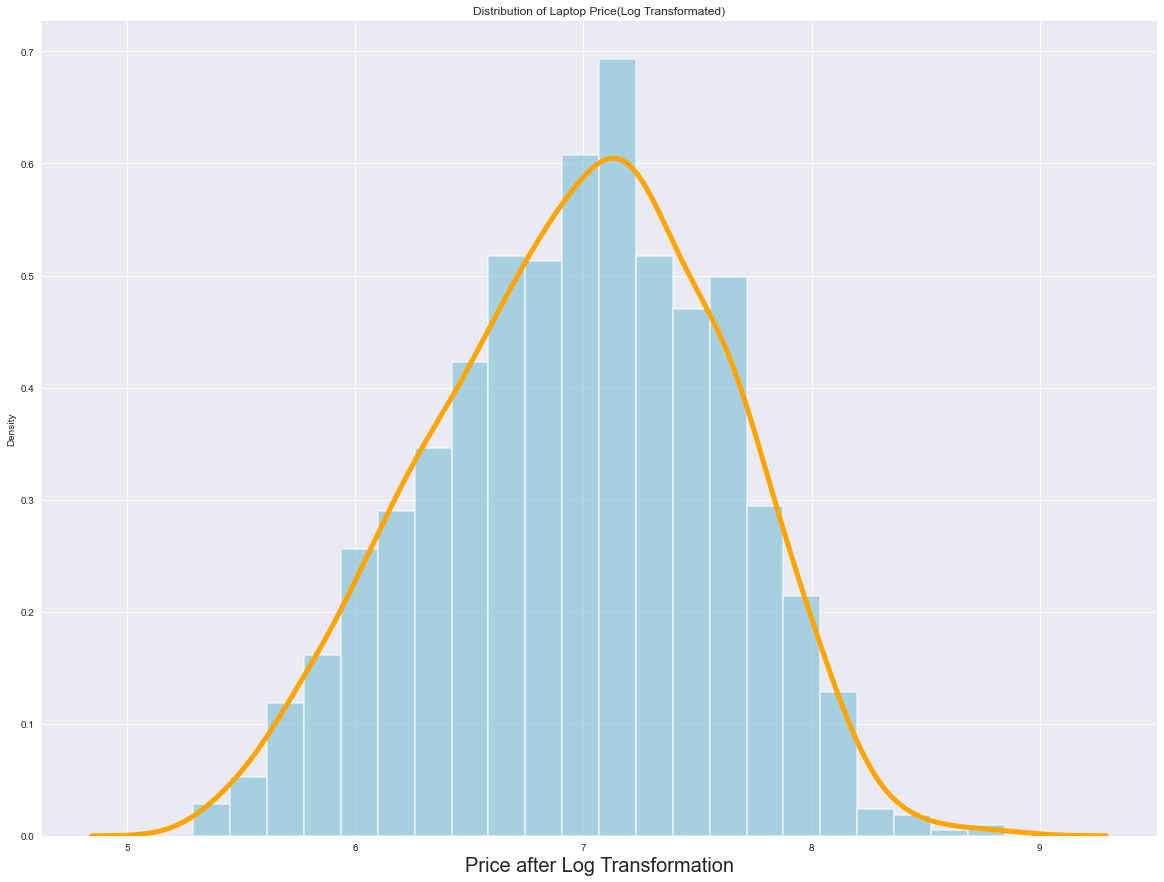

In [5]:
sns.distplot(np.log(laptop_data['$Price']), kde_kws={'color':'orange', 'lw':5},
            hist_kws={'lw':2, 'color':'c', 'alpha':0.5})
sns.set({'figure.figsize':(20,15)})
plt.title('Distribution of Laptop Price(Log Transformated)')
plt.xlabel('Price after Log Transformation', size=20)
plt.show()


Our main focus is on Price. The distribution of the price data is skewed to right. That's understable that there are many laptops in the market whose price is lower and few shose  price is high.

Real life distributions are usually skewed, So in skewed data, the tail region may act as an outlier for the statistical model and outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. A log transformation can help to fit a skewed distribution into a Gaussian one. Later, we do reverse log transformation to get original value.


# Analysis of 'Different Laptop Company'

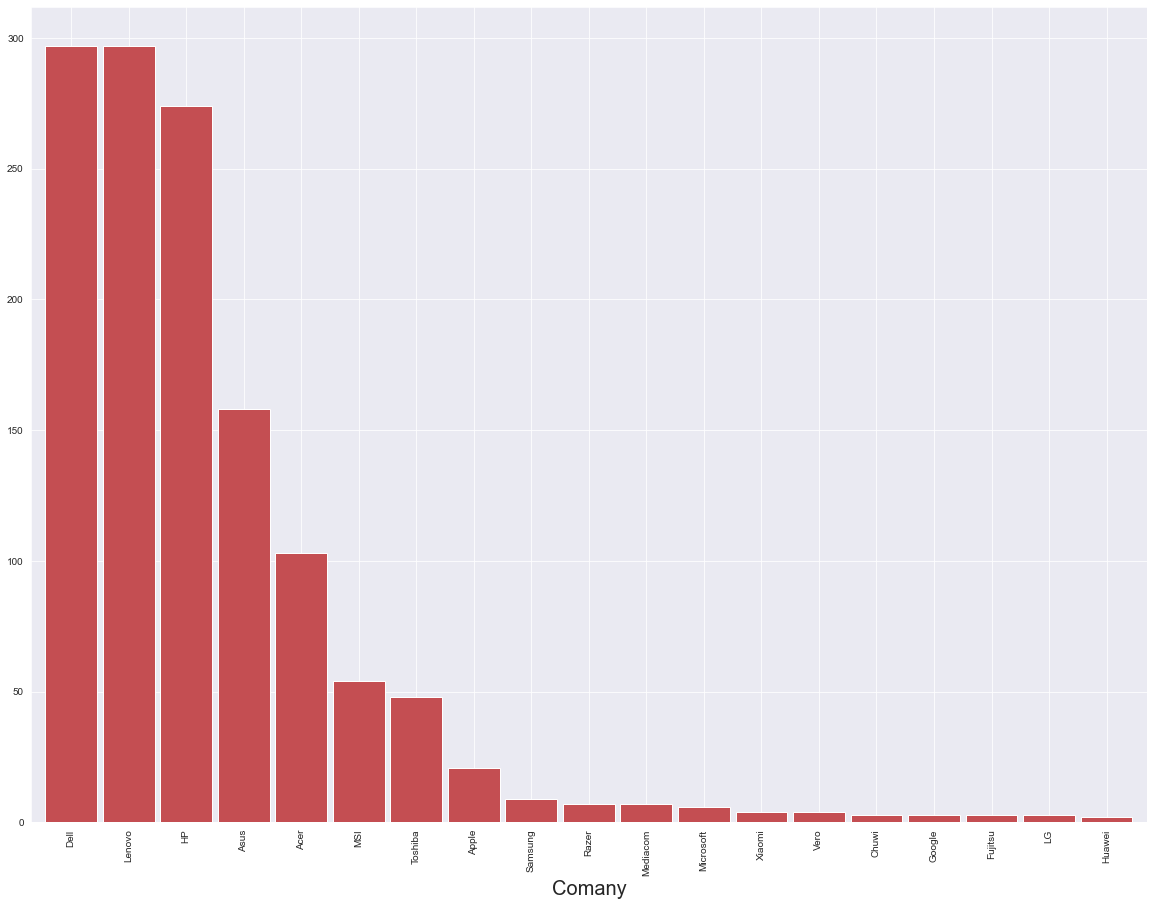

In [6]:
laptop_data['Company'].value_counts().plot(kind='bar', width= 0.9, color='r')
plt.xlabel('Comany', size=20)
plt.show()

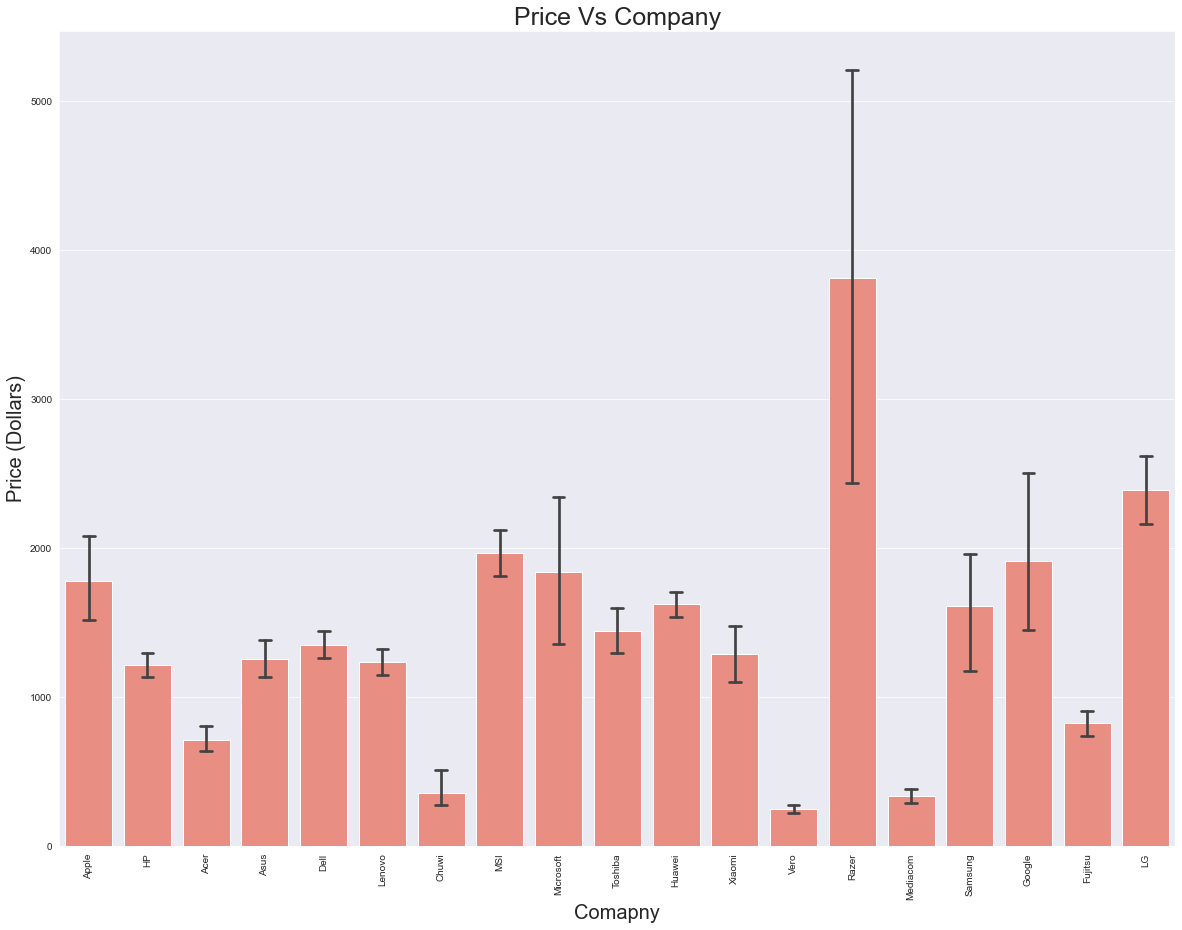

In [7]:
rc=sns.barplot(x=laptop_data['Company'], y=laptop_data['$Price'], color='salmon', capsize=.2)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Price Vs Company', size=25)
plt.xlabel('Comapny', size=20)
plt.ylabel('Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

At first glance, it would make sense that Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba have high demand, where as Apple, Samsung, Razer ect are not demandable.
Brand makes significant difference in price. By checking the average price of each brand, We find out that price of Razer, LG, Google, Samsung, Microsoft, MSI, Apple brand are high. Budget brands are HP, Acer, Asus, Dell etc. 

#  Analysis of 'Different Type of Laptops'

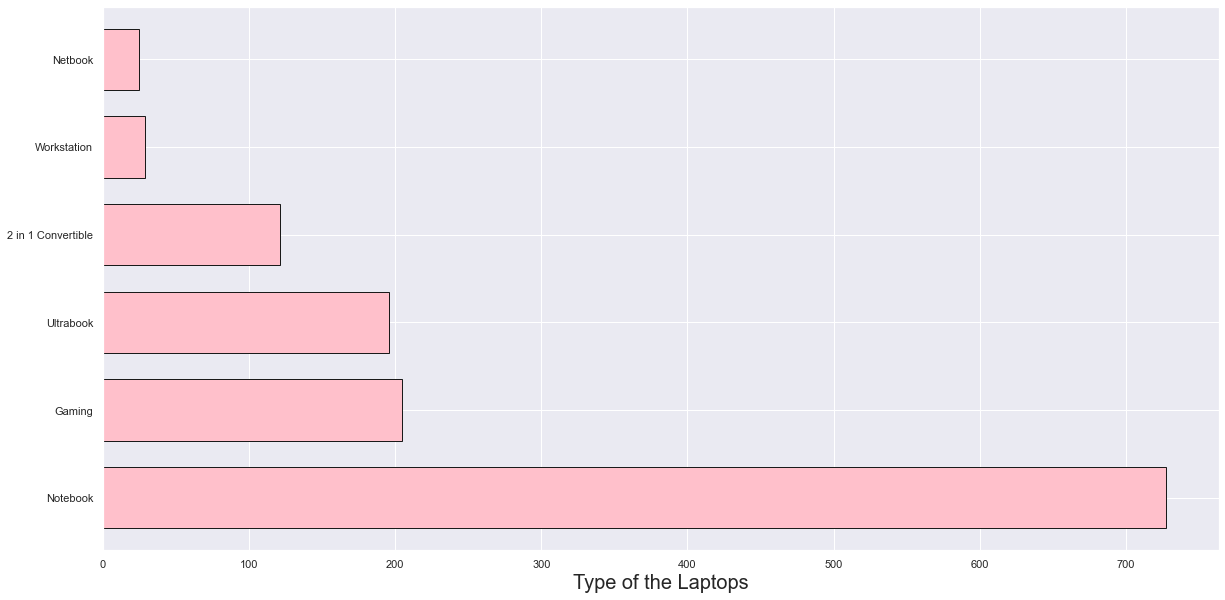

In [8]:
laptop_data['TypeName'].value_counts().plot(kind='barh', width= 0.7, color='pink', edgecolor='k')
plt.xlabel('Type of the Laptops', size=20)
plt.show()

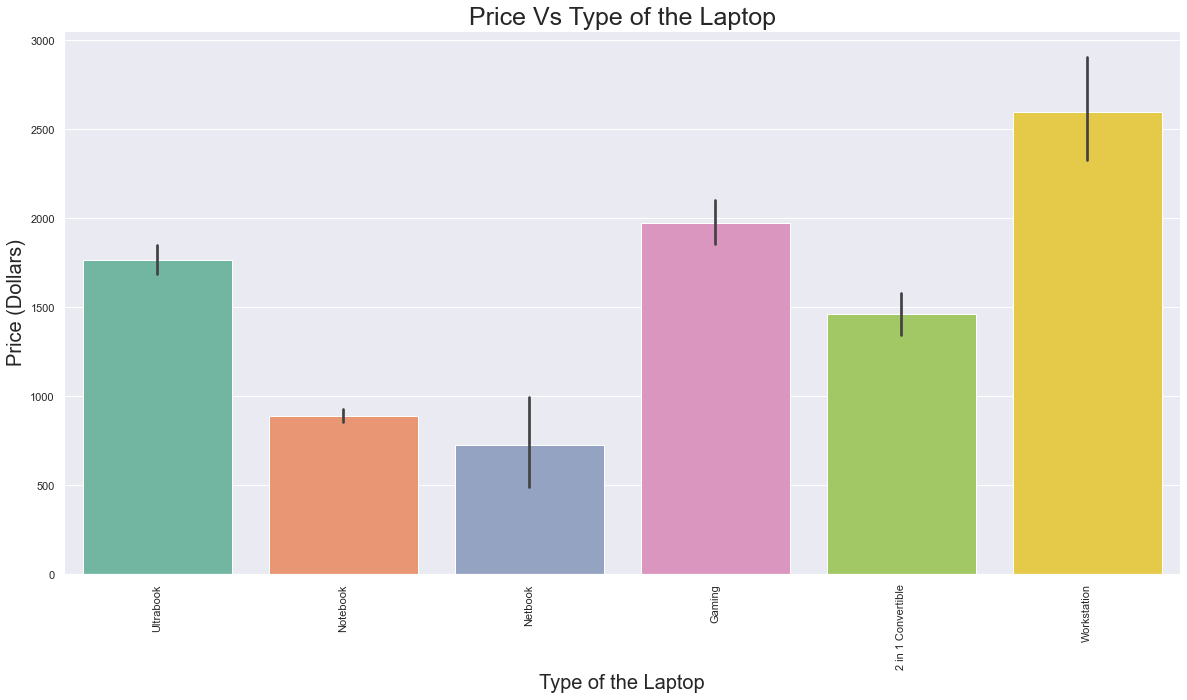

In [9]:
sns.barplot(x=laptop_data['TypeName'], y=laptop_data['$Price'], palette='Set2')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Type of the Laptop', size=25)
plt.xlabel('Type of the Laptop', size=20)
plt.ylabel('Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

What type of laptop you are buying, that affect the price. Notebooks are selling high but it's price effective, workstation has high range laptops.

# Analysis of 'Screen Size of the Laptops' Specification

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


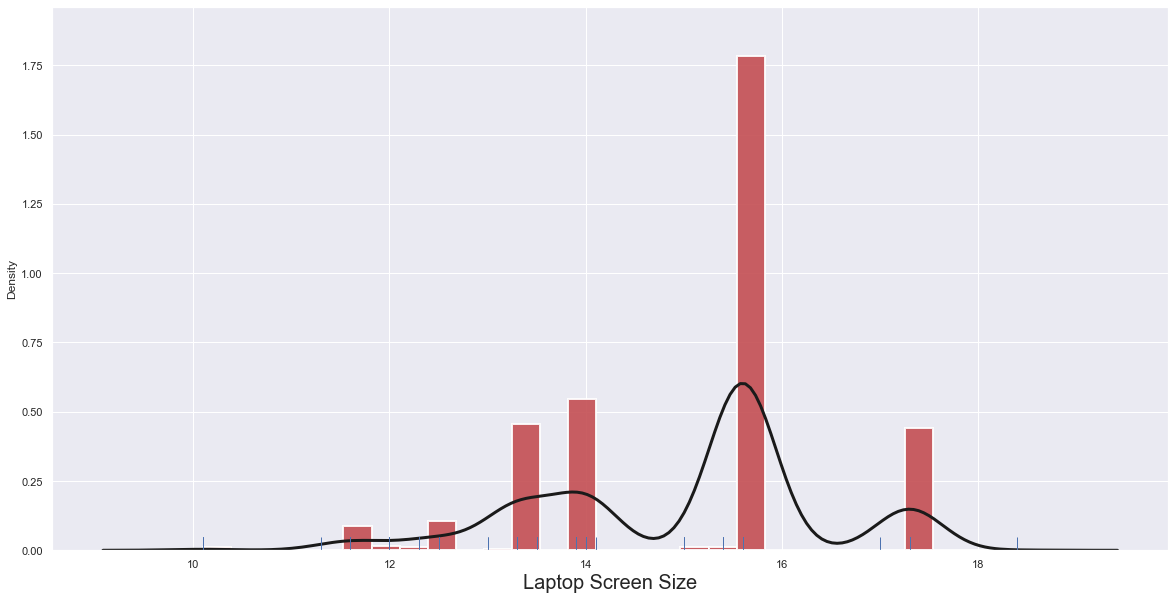

In [10]:
sns.distplot(laptop_data['Inches'], rug=True, rug_kws={'color':'b'}, 
             kde_kws={'color':'k', 'lw':3},
            hist_kws={'lw':2, 'color':'r', 'alpha':0.9})
sns.set({'figure.figsize':(15,10)})
plt.xlabel('Laptop Screen Size', size=20)
plt.show()

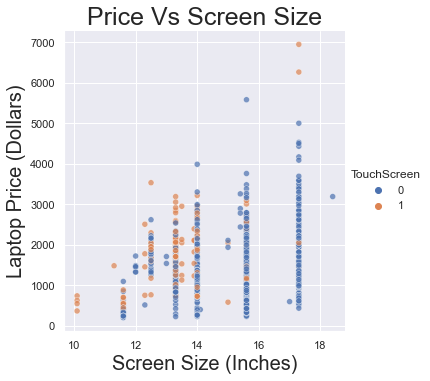

In [11]:
sns.relplot(x=laptop_data['Inches'], y=laptop_data['$Price'], data=laptop_data, hue='TouchScreen', alpha=0.7)
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Screen Size', size=25)
plt.xlabel('Screen Size (Inches)', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

Inches- Categorical value seems discret(not continuous). Around 16 inches laptop is selling high. Laptop Price varies with screen size, But it seems that this relationship (correlation) is not strong. Big Scrren size has higher price, But some high size laptops has lower price as well.

#  Analysis of 'Screen Resolution' Specification

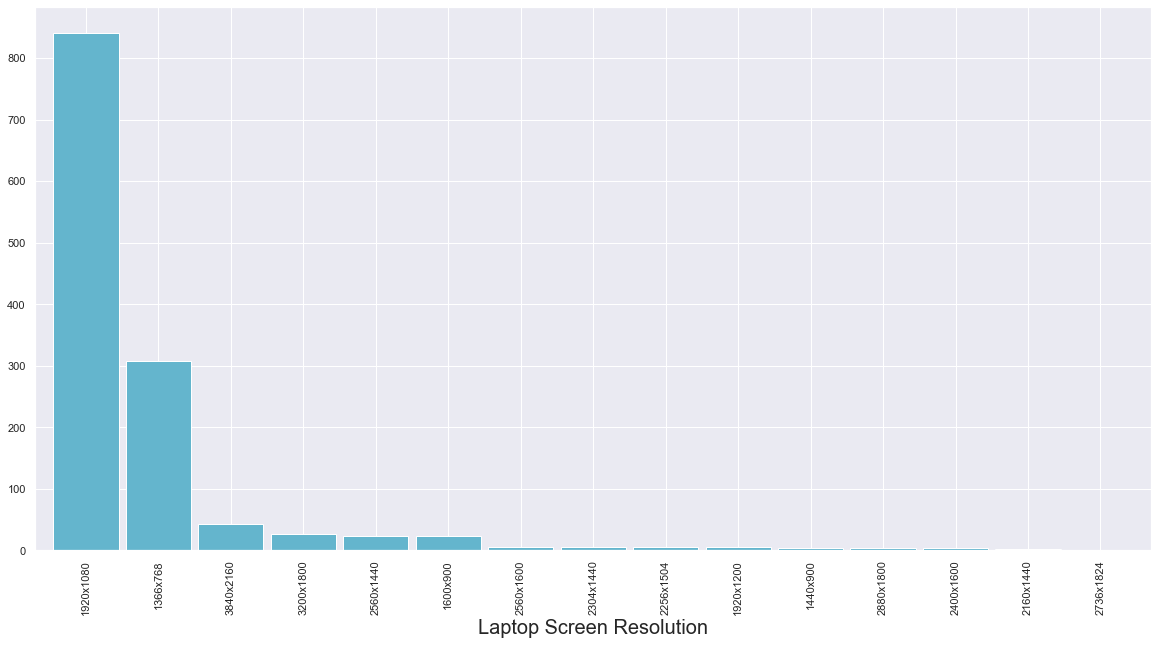

In [12]:
laptop_data['ScreenResolution'].value_counts().plot(kind='bar', width=0.9, color='c')
sns.set({'figure.figsize':(15,10)})
plt.xlabel('Laptop Screen Resolution', size=20)
plt.show()

This means that the screen will have a width of 1,920 pixels while the height of the screen will be 1,080 pixels. This results in a grand total of 2,073,600 pixels on-screen, is in demand


# Analysis of 'Touch Screen' Specification

In [13]:
touch = laptop_data['TouchScreen'].value_counts()
touch

0    1111
1     192
Name: TouchScreen, dtype: int64

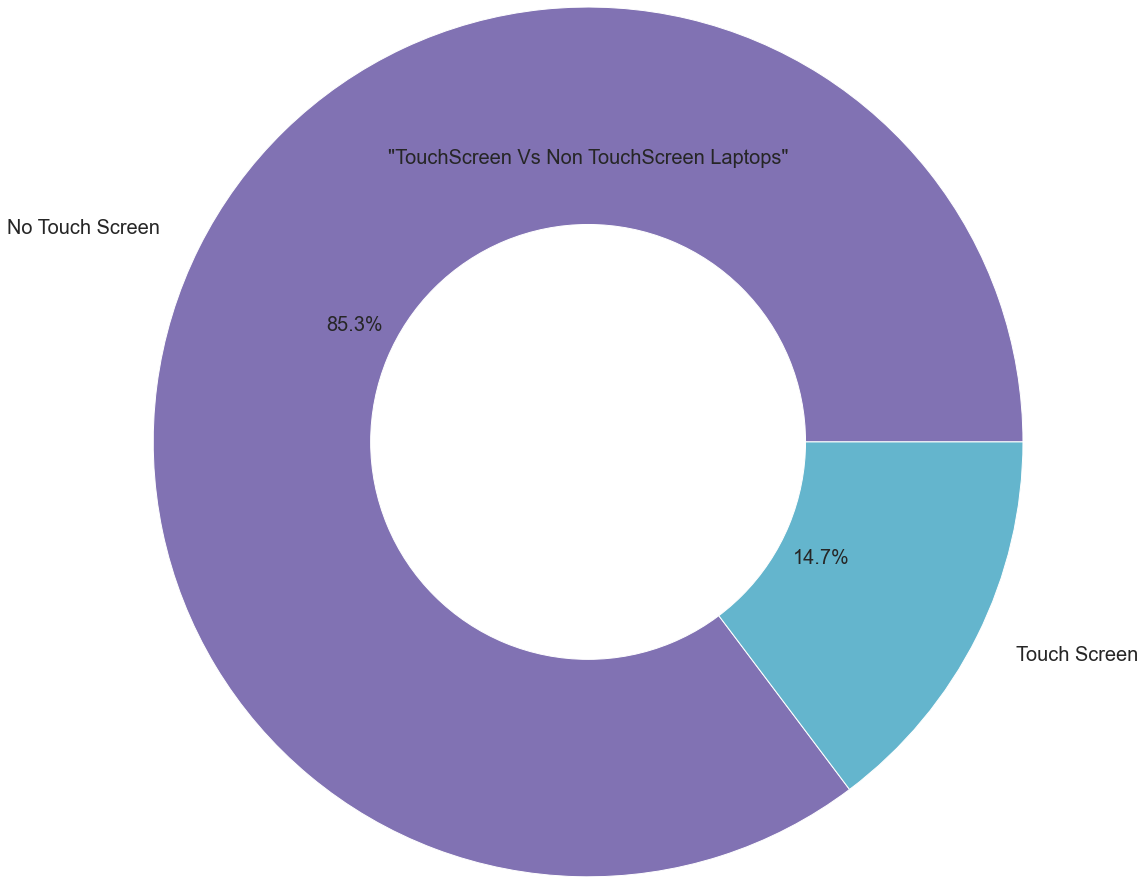

In [14]:
label = ['No Touch Screen', 'Touch Screen']
touchscreen = touch[0]
No_touchscreen = touch[1]
plt.pie(touch, labels=label,autopct= '%0.1f%%', colors=['m', 'c'], radius=2, textprops={'fontsize':20,})
plt.pie([1], colors=['w'], radius=1)
sns.set({'figure.figsize':(10,7)})
plt.title('"TouchScreen Vs Non TouchScreen Laptops"', size=20)
plt.show()


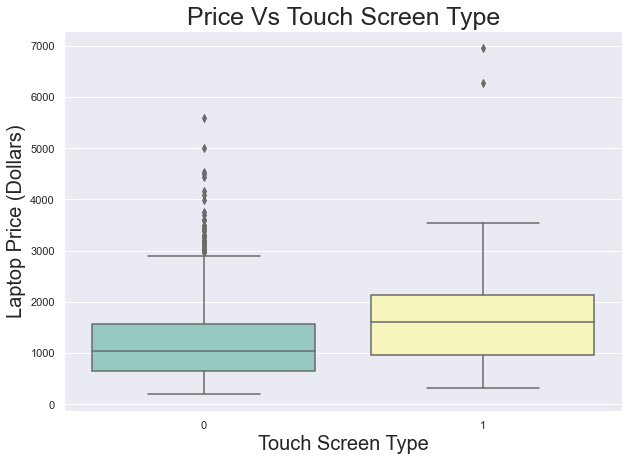

In [15]:
sns.boxplot(x=laptop_data['TouchScreen'], y=laptop_data['$Price'], palette='Set3')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Touch Screen Type', size=25)
plt.xlabel('Touch Screen Type', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

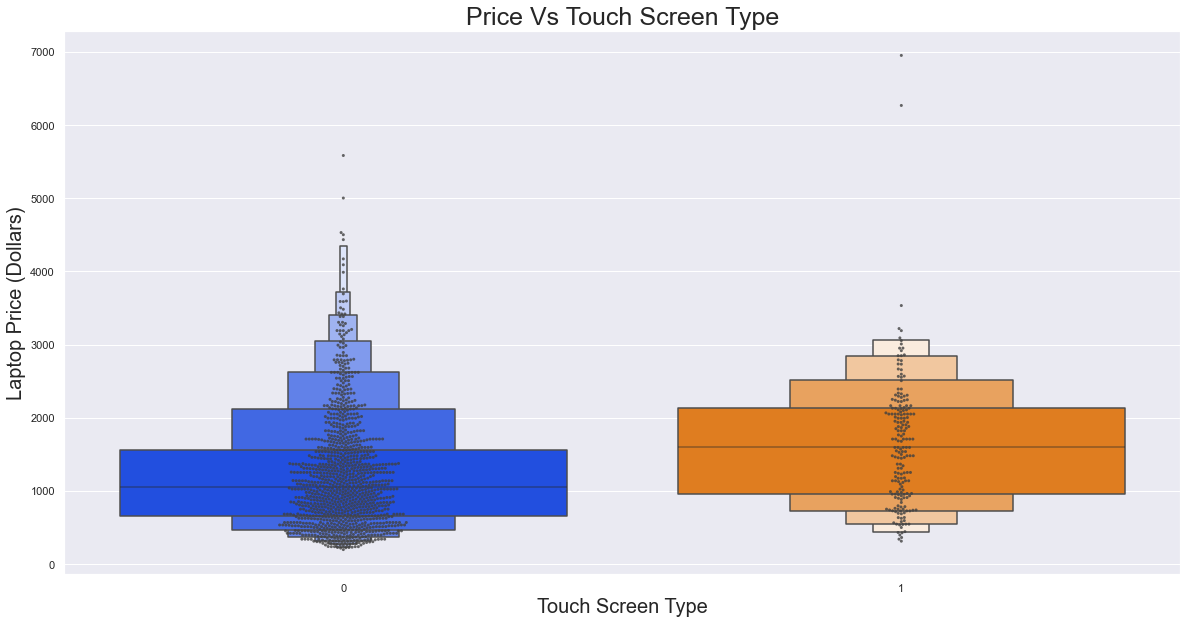

In [16]:
sns.boxenplot(x=laptop_data['TouchScreen'], y=laptop_data['$Price'], palette='bright', showfliers = False)
sns.swarmplot(x=laptop_data['TouchScreen'], y=laptop_data['$Price'], size = 3, color='.25', alpha=0.8)
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs Touch Screen Type', size=25)
plt.xlabel('Touch Screen Type', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

We have about 85% no touch screen laptops, and 15% touch screen laptops, and Touch Screen laptop price is higher than without touch screen facility. 

#  Analysis of 'IPS Panel' Specification

In [17]:
ips = laptop_data['IPS'].value_counts()
ips

0    938
1    365
Name: IPS, dtype: int64

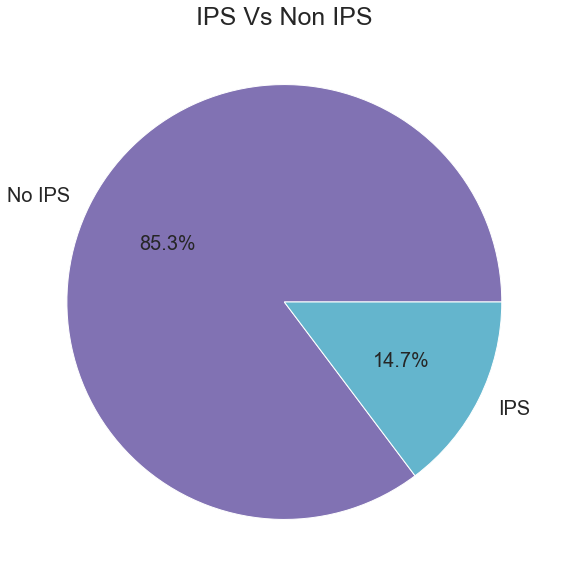

In [18]:
label_2 = ['No IPS', 'IPS']
ips_result = ips[0]
No_touchscreen = ips[1]
plt.pie(touch, labels=label_2, autopct= '%0.1f%%', colors=['m', 'c'], textprops={'fontsize':20,})
sns.set({'figure.figsize':(20,10)})
plt.title('IPS Vs Non IPS', size=25)
plt.show()

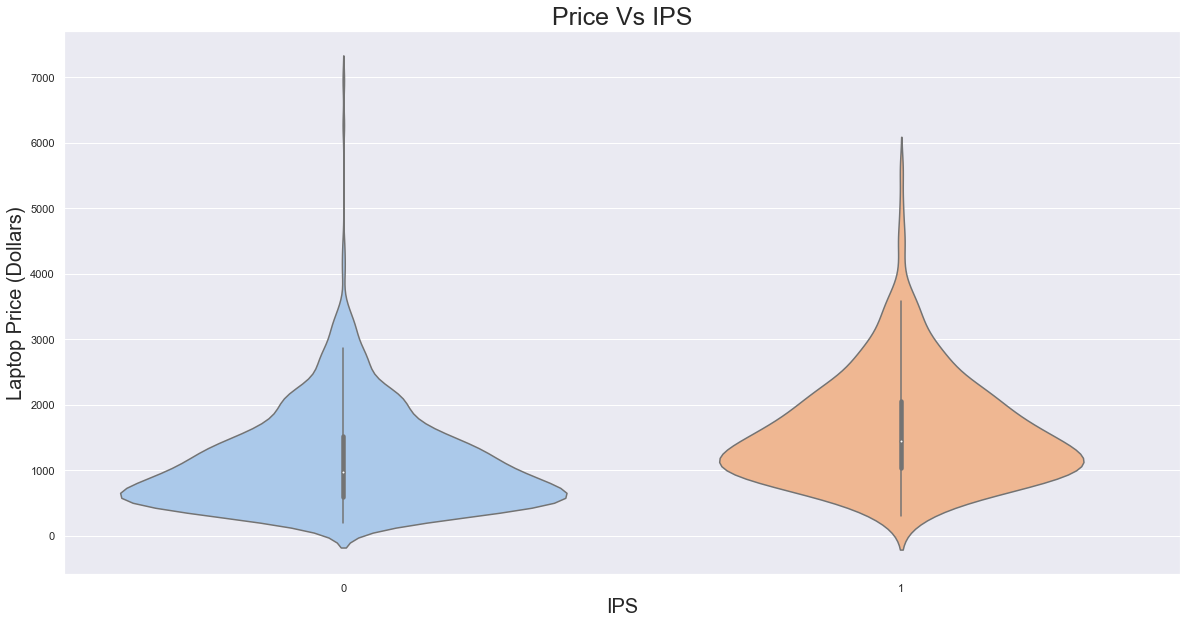

In [19]:
sns.violinplot(x=laptop_data['IPS'], y=laptop_data['$Price'], showmedians=True, palette='pastel')
sns.set({'figure.figsize':(20,10)})
plt.title('Price Vs IPS', size=25)
plt.xlabel('IPS', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.show()

IPS stands for in-plane switching. An IPS monitor provides better visual quality than an LED monitor, leading to more power consumption to maintain excellent on-screen performance. Although LED monitors provide brighter screens, their power consumption is much less than IPS panel. In our dataset, Most of the laptops (about 85%) has no IPS. Non_IPS display has higher price than with IPS display.

# Analysis of 'CPU Processor'

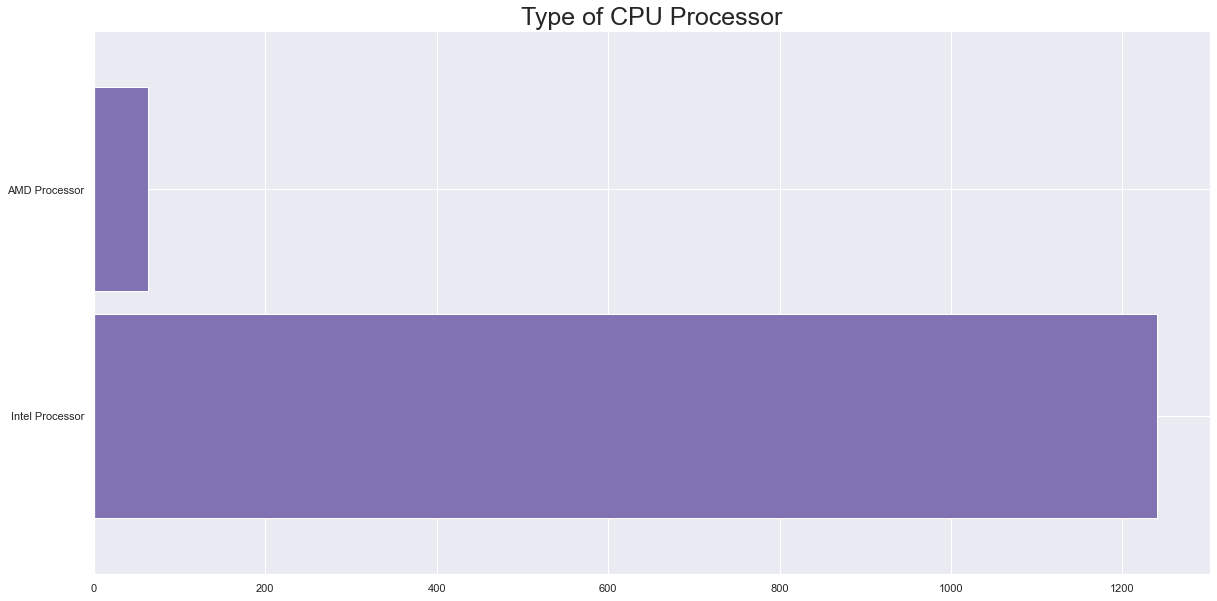

In [20]:
laptop_data['Cpu processor'].value_counts().plot(kind='barh', width=0.9, color='m')
sns.set({'figure.figsize':(10,7)})
plt.title('Type of CPU Processor', size=25)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


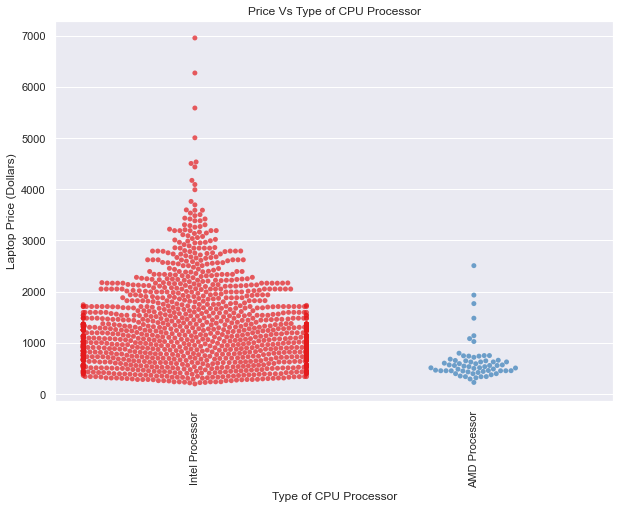

In [21]:
sns.swarmplot(x=laptop_data['Cpu processor'], y=laptop_data['$Price'], data=laptop_data, alpha=0.7, palette='Set1')
sns.set({'figure.figsize':(15,10)})
plt.title('Price Vs Type of CPU Processor')
plt.xlabel('Type of CPU Processor')
plt.ylabel('Laptop Price (Dollars)')
plt.xticks(rotation='vertical')
plt.show()

When you compare AMD vs Intel CPU specifications, you can see that Intel offers options with lower pricing, more performance, and a more modern platform that supports both DDR5 and PCIe 5.0. Our data says, Intel processors are in demand. Price are highter in Intel Processors.

# Analysis of 'RAM' Specification

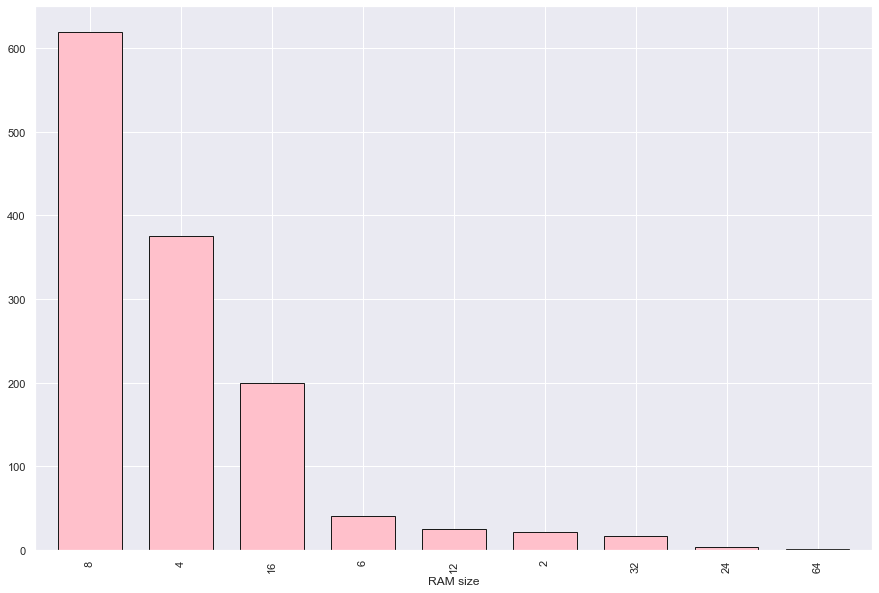

In [22]:
laptop_data['Ram'].value_counts().plot(kind='bar', width= 0.7, color='pink', edgecolor='k')
sns.set({'figure.figsize':(15,10)})
plt.xlabel('RAM size')
plt.show()

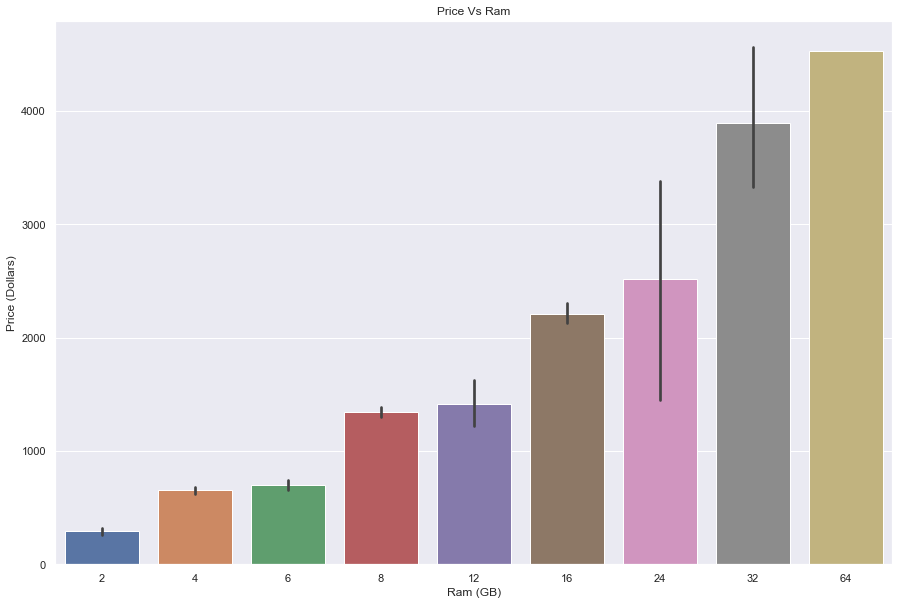

In [23]:
sns.barplot(x=laptop_data['Ram'], y=laptop_data['$Price'])
sns.set({'figure.figsize':(15,10)})
plt.title('Price Vs Ram')
plt.xlabel('Ram (GB)')
plt.ylabel('Price (Dollars)')
plt.show()

8GB RAM seems popular. That's quite obvious that higher RAM laptops have high price. No significant difference between 8GB and 12GB. May be, due to compitition, some brand sell 12GB RAM around the 8GB price. 

It's clearly seen that 'Price' and 'Ram' has linear relationship. As RAM increses, Price increses.

# Correlation with 'Price'

In [24]:
laptop_data.corr()['$Price']

Inches               0.068197
Ram                  0.743007
Weight_lb            0.210370
$Price               1.000000
TouchScreen          0.191226
IPS                  0.252208
X_res                0.556529
Y_res                0.552809
Total_memory_size   -0.112085
HDD                 -0.095476
SSD                  0.670799
Hybrid              -0.004769
Flash_storage       -0.040511
Name: $Price, dtype: float64

Price have
Weak-Negative correlation with HDD. It means, higher HDD type of Memory; lower the 'price' would be.
Strong-Positive correlation with SSD. 0.67 shows high SSD type of memory; higher the 'price' would be.
Very Weak-Negative correlation with Hybrid and Flash Storage. It doesn't make any difference in 'Price'

As 'Price' doesn't depend on the 'Hybrid' and 'Flash storage'; we can ignore these two columns; and there is no need of X_resolution and y_resolution. So, we can ignore them too.

In [25]:
laptop_data = laptop_data.drop(columns=['Hybrid', 'Flash_storage', 'X_res', 'Y_res'])
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight_lb,$Price,TouchScreen,IPS,Cpu processor,Processor_speed_GHz,Memory_type,Total_memory_size,HDD,SSD
0,Apple,Ultrabook,13.3,2560x1600,8,Average,No OS,3.02085,1527.25,0,1,Intel Processor,2.3,SSD,256,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Average,No OS,2.95470,1024.79,0,0,Intel Processor,1.8,Flash Storage,256,0,0
2,HP,Notebook,15.6,1920x1080,8,Average,No OS,4.10130,655.50,0,0,Intel Processor,2.5,SSD,512,0,256
3,Apple,Ultrabook,15.4,2880x1800,16,Average,No OS,4.03515,2892.69,0,1,Intel Processor,2.7,SSD,1024,0,512
4,Apple,Ultrabook,13.3,2560x1600,8,Average,No OS,3.02085,2056.10,0,1,Intel Processor,3.1,SSD,512,0,256


# Analysis of 'Laptop Operating System' Specification

In [26]:
os = laptop_data['OpSys'].value_counts()

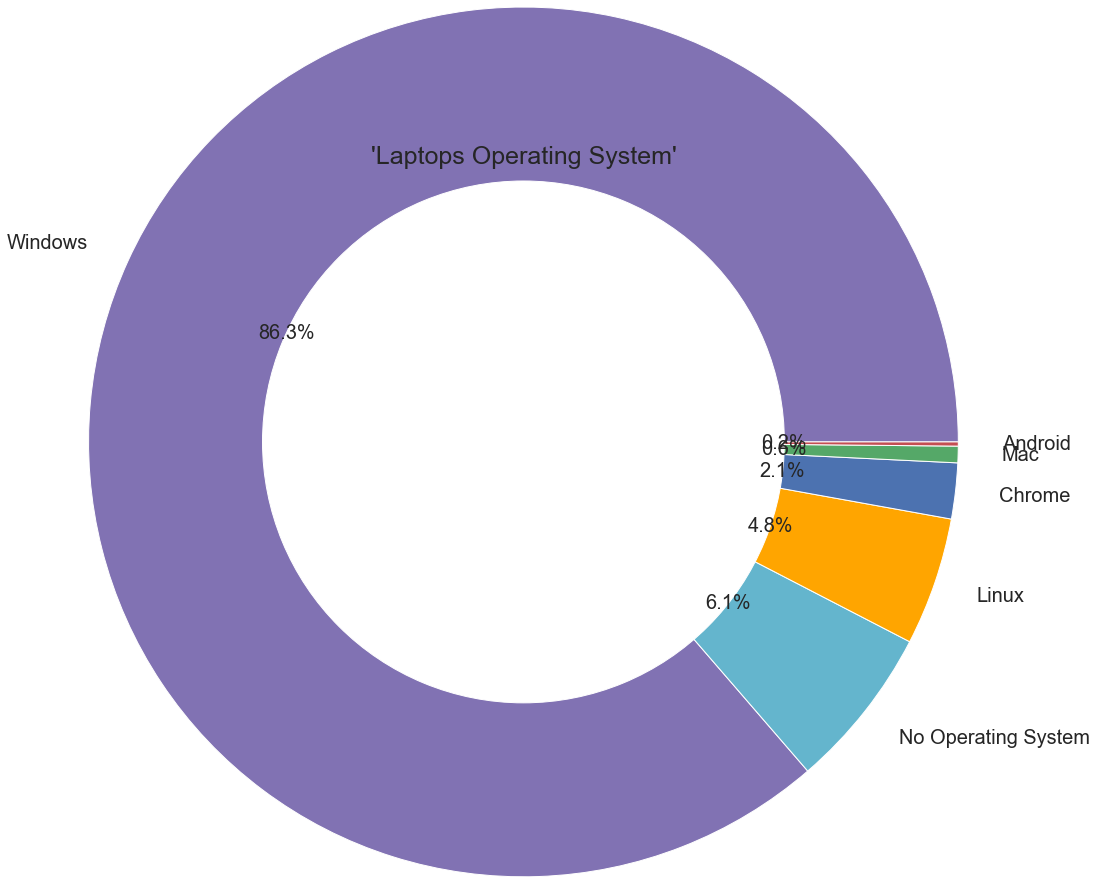

In [27]:
label_3 = ['Windows', 'No Operating System', 'Linux', 'Chrome', 'Mac', 'Android']
OpSys = [os[0], os[1], os[2], os[3], os[4], os[5]]
plt.pie(OpSys, labels=label_3,autopct= '%0.1f%%', radius=2, textprops={'fontsize':20,}, colors=['m', 'c', 'orange', 'b', 'g', 'r'])
plt.pie([1], colors=['w'], radius=1.2)
sns.set({'figure.figsize':(10,7)})
plt.title("'Laptops Operating System'", size=25)
plt.show()

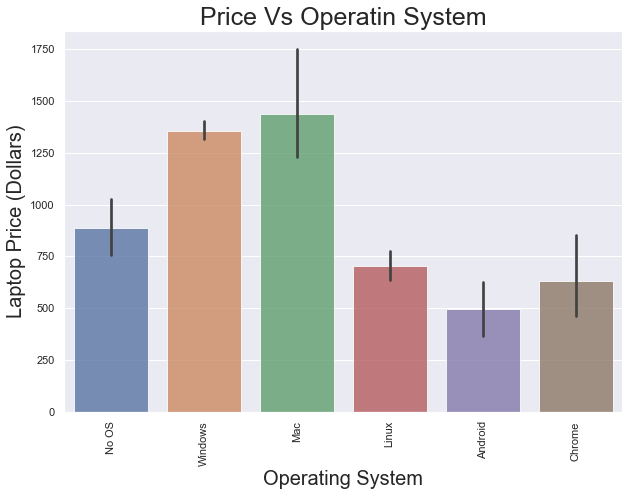

In [28]:
sns.barplot(x=laptop_data['OpSys'], y=laptop_data['$Price'], data=laptop_data, alpha=0.8)
sns.set({'figure.figsize':(20,15)})
plt.title('Price Vs Operatin System', size=25)
plt.xlabel('Operating System', size=20)
plt.ylabel('Laptop Price (Dollars)', size=20)
plt.xticks(rotation='vertical')
plt.show()

Windows operating system is in demand and 'Price' is higher in Windows and MAC operating system. 

# Correlation

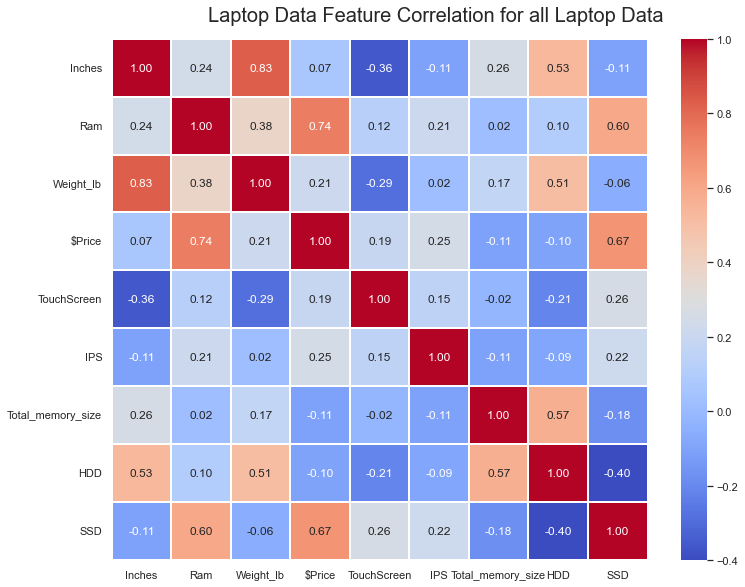

In [29]:
corr_data = laptop_data.corr()
f, ax = plt.subplots(figsize=(12,9))
hmap = sns.heatmap(round(corr_data, 2), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.05)
f.subplots_adjust (top=0.93)
t = f.suptitle('Laptop Data Feature Correlation for all Laptop Data', fontsize=20)

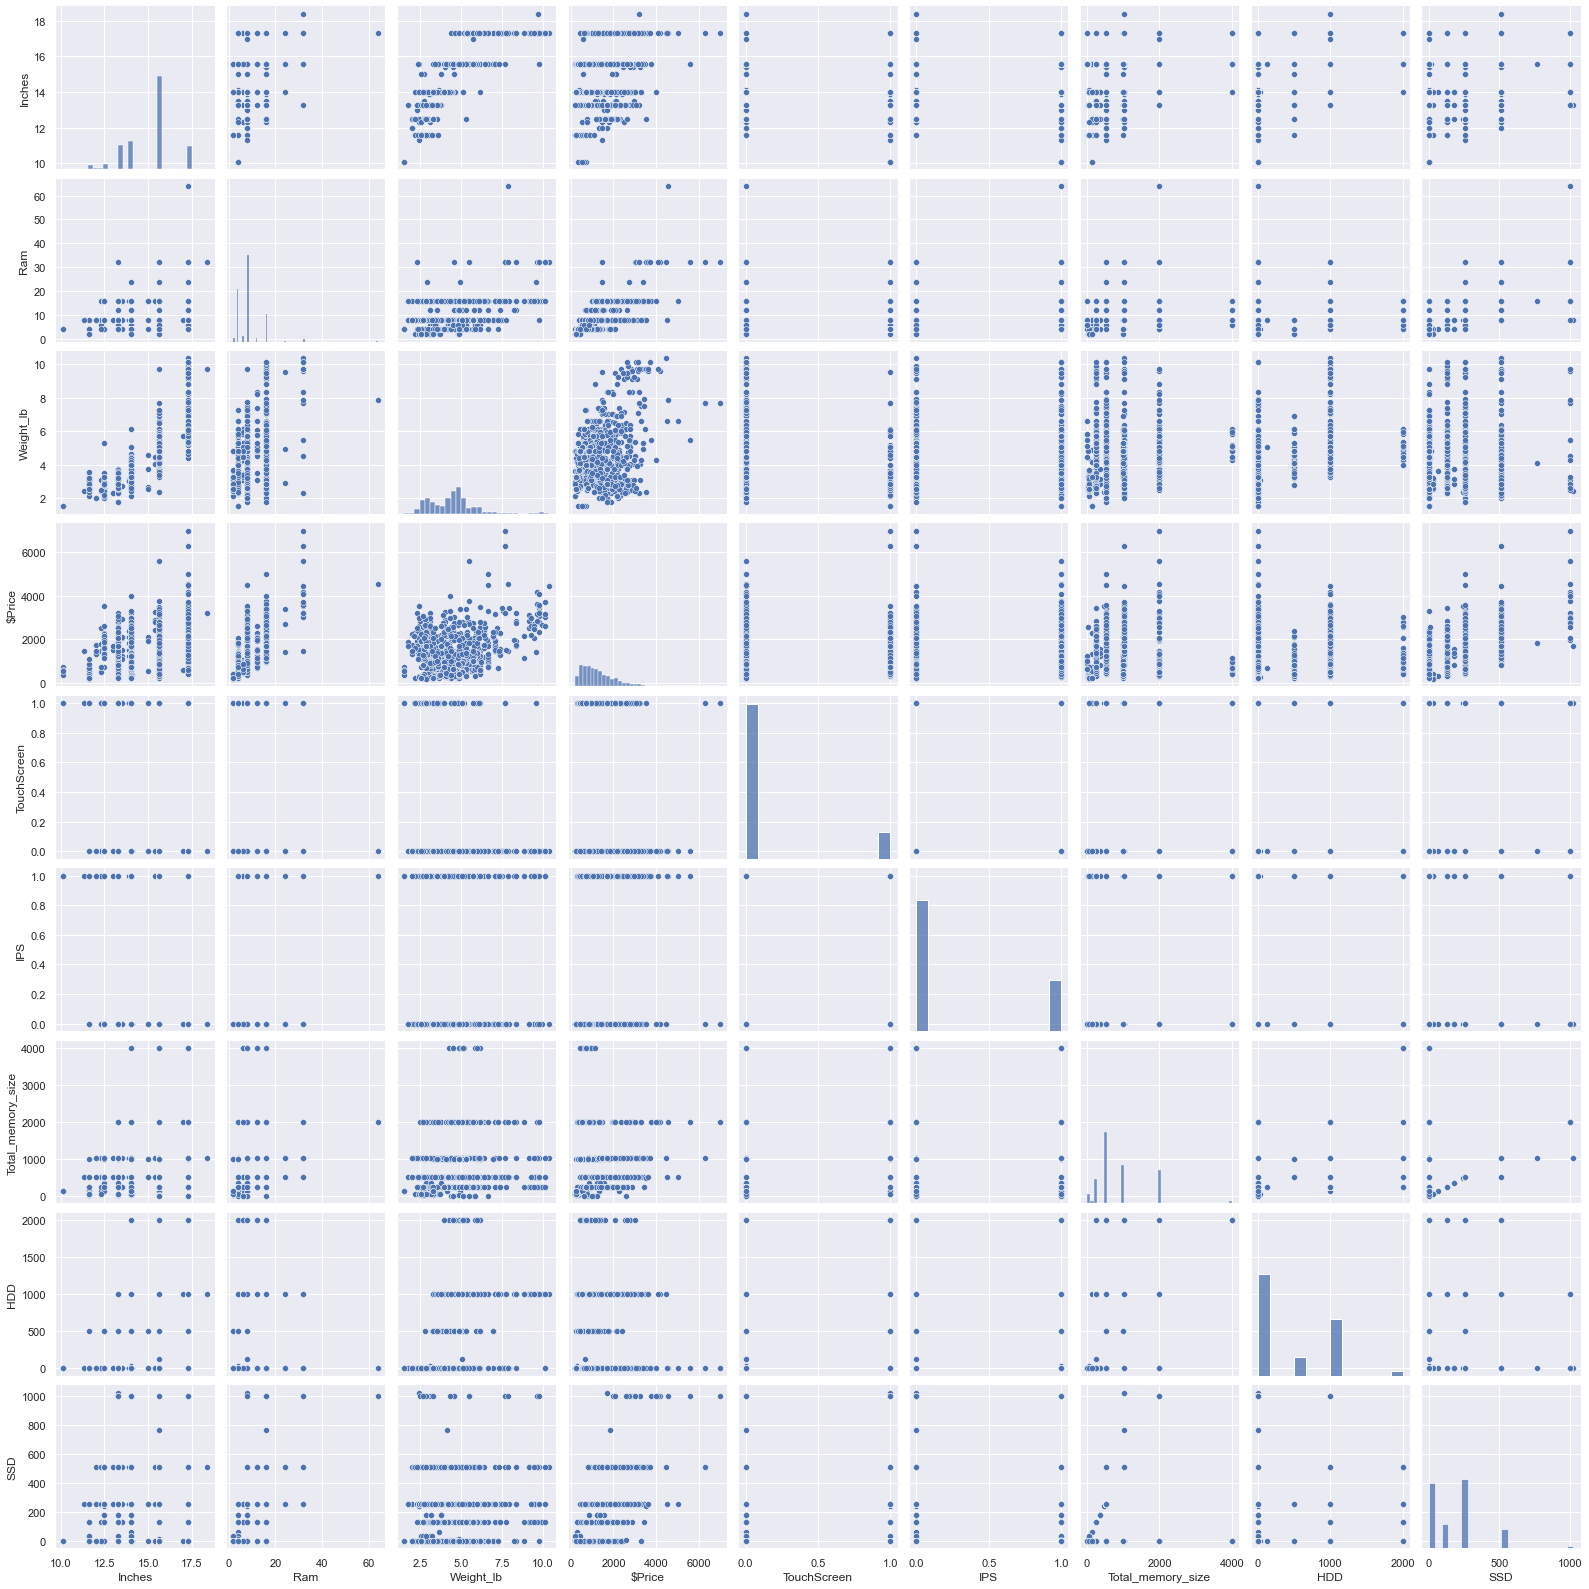

In [30]:
sns.pairplot(laptop_data)
plt.show()

# Visulize Notable Correlations

Strong Positive Correlation Price:RAM (0.74)

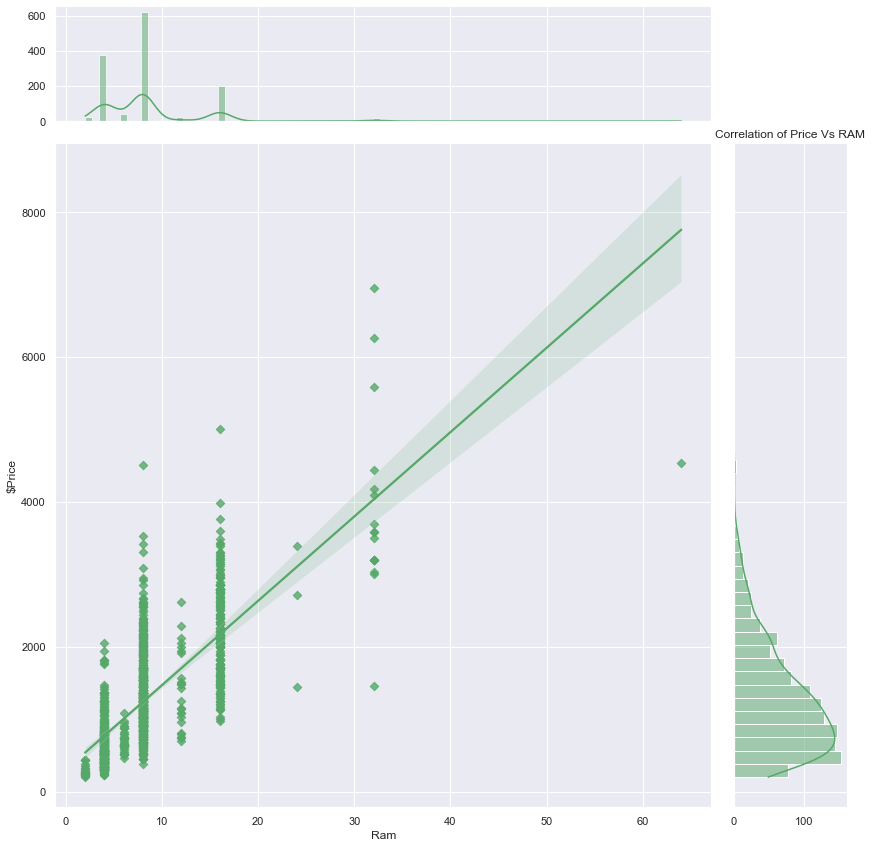

In [31]:
sns.jointplot(x='Ram', y='$Price', data=laptop_data, kind='reg', color='g', height=12, marginal_ticks=True, marker='D')
plt.title('Correlation of Price Vs RAM')
plt.xlabel('Size of RAM')
plt.ylabel('Laptop Price (Dollars)')
plt.show()

Strong Positive Correlation Price:SSD (0.67)

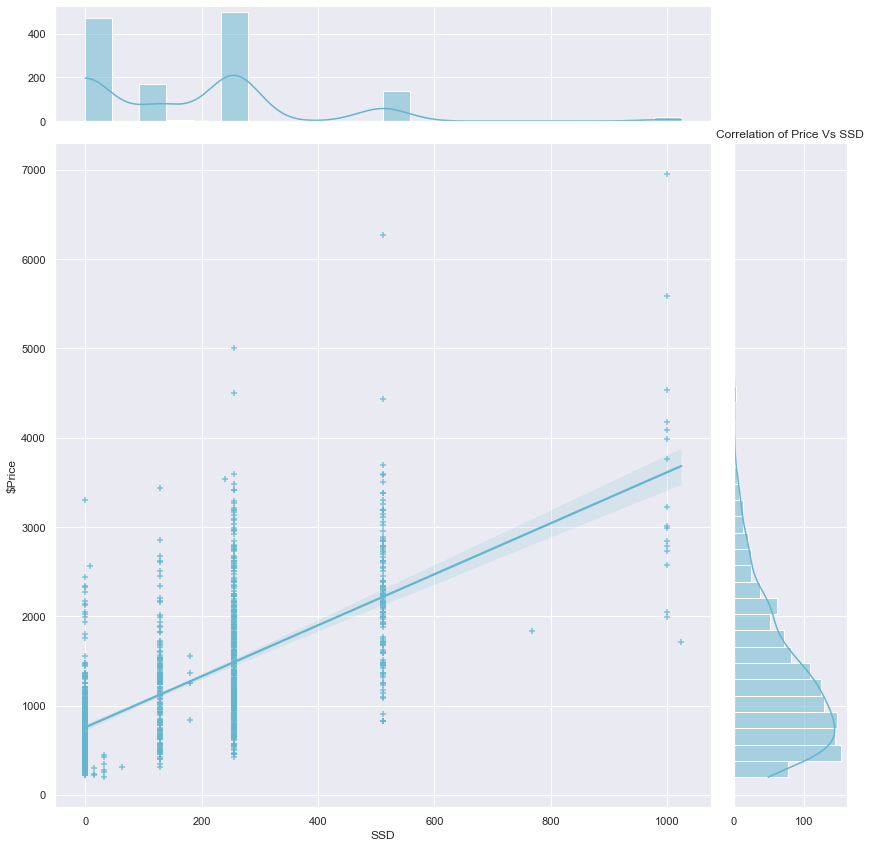

In [32]:
sns.jointplot(x='SSD', y='$Price', data=laptop_data, kind='reg', color='c', height=12, marginal_ticks=True, marker='+')
plt.title('Correlation of Price Vs SSD')
plt.xlabel('Size of SSD')
plt.ylabel('Laptop Price (Dollars)')
plt.show()

Moderately Strong Negative Correlation SSD:Screen Size (-0.11)

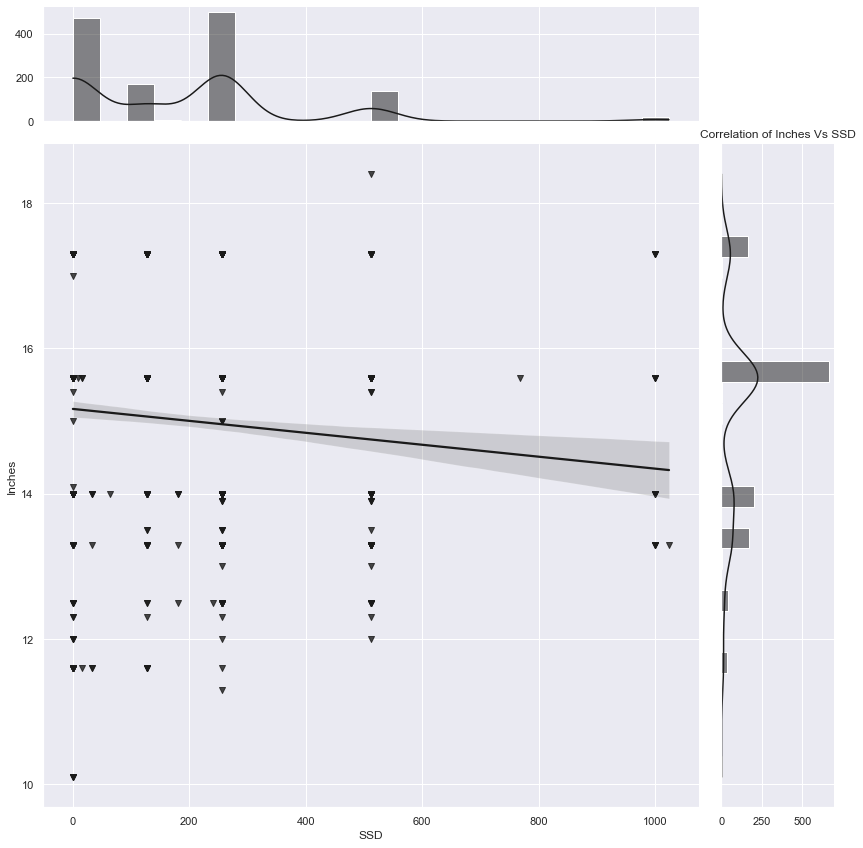

In [33]:
sns.jointplot(x='SSD', y='Inches', data=laptop_data, kind='reg', color='k',marker='v', height=12, marginal_ticks=True)
plt.title('Correlation of Inches Vs SSD')
plt.xlabel('Size of SSD')
plt.ylabel('Laptop Size (Inches)')
plt.show()

Strong Negative Correlation HDD:SSD (-0.40)

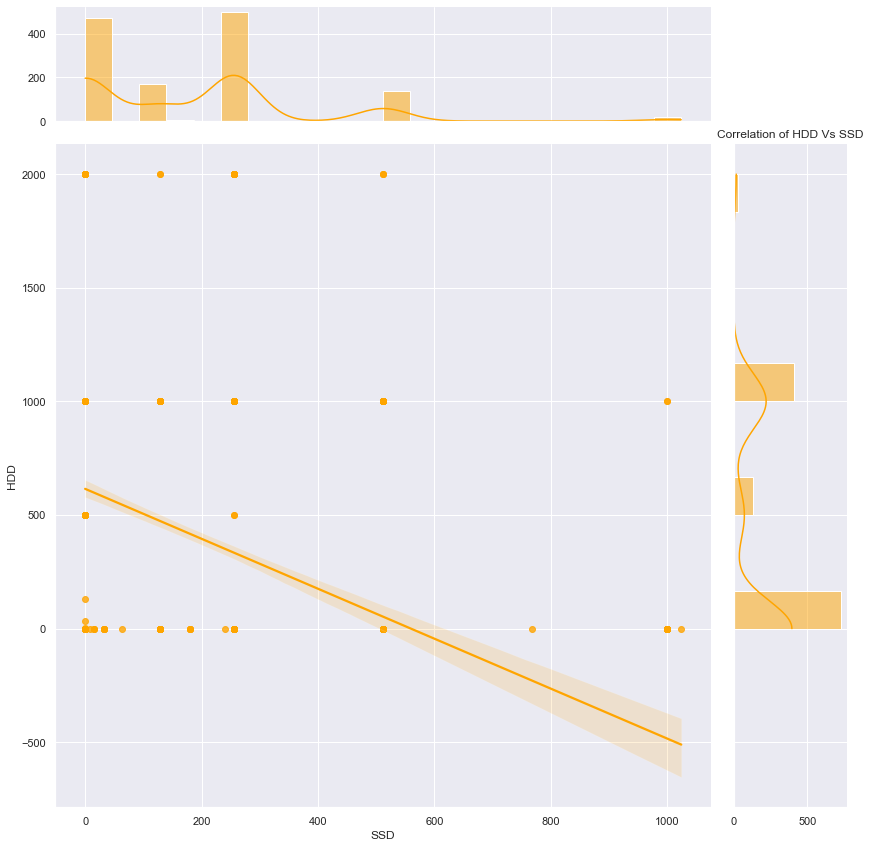

In [34]:
sns.jointplot(x='SSD', y='HDD', data=laptop_data, kind='reg', color='orange', height=12, marginal_ticks=True)
plt.title('Correlation of HDD Vs SSD')
plt.xlabel('Size of SSD')
plt.ylabel('Size of HDD')
plt.show()

# Correlations

The findings from the EDA analysis of the variables and correlations revealed that the strongest positive correlation is between the Price and Size of RAM (r=0.74). This makes sense intuitively, as typically the more RAM size, the more the price of the laptop.

Additionally, there was another strong correlation between the Price and Size of SSD (r=0.67). It appears that as the size of SSD increase, so does the Price.

There were two weak-moderately strength negative correlations. The first, between SSD and Inches (r=-0.11), indicate that as the SSD size increase, the screen size decrease; That doesn't make sense.

suggests that as the percentage of rucks won increases, the penalties against that team decreases.

The second, between HDD and SSD (r=-0.40), suggests that as the SSD size increases, the HDD size decreases. That makes sense. A laptop has a perticular type of memory.